In [1]:
import matplotlib.pyplot as plt

# Random Numbers Generators

## Lehmers Generator

### Example 1

In [2]:
from BNumMet.Random import lehmers_rand

for i in range(10):
    print(lehmers_rand())

Lehmers Random Number Generator Initialized with default values
	a=16807
	c=0
	m=2147483647
	x=1.0
7.826369259425611e-06
0.13153778814316625
0.7556053221950332
0.4586501319234493
0.5327672374121692
0.21895918632809036
0.04704461621448613
0.678864716868319
0.6792964058366122
0.9346928959408276


### Example 2

In [3]:
from BNumMet.Random import lehmers_rand, clear_lehmers_vars

clear_lehmers_vars()
arr = [1]
for i in range(10):
    aux = lehmers_rand(a=2**16 + 3, m=2**31, c=0, x=arr[-1])
    if len(arr) >= 3:
        lehmerFormula = (6 * arr[-1] - 9 * arr[-2]) % 1  # Test Xn = (6Xn-1 - 9Xn-2)
        print(f"Lehmer's = {aux}\nPredicted = {lehmerFormula}\n")
    arr.append(aux)

Lehmer's = 0.0008239871822297573
Predicted = 0.0008239871822297573

Lehmer's = 0.003295936156064272
Predicted = 0.003295936156064272

Lehmer's = 0.012359732296317816
Predicted = 0.012359732296317816

Lehmer's = 0.04449496837332845
Predicted = 0.04449496837332845

Lehmer's = 0.15573221957311034
Predicted = 0.15573221957311034

Lehmer's = 0.533938602078706
Predicted = 0.533938602078706

Lehmer's = 0.8020416363142431
Predicted = 0.8020416363142431

Lehmer's = 0.006802399177104235
Predicted = 0.006802399177104235



### Example 3

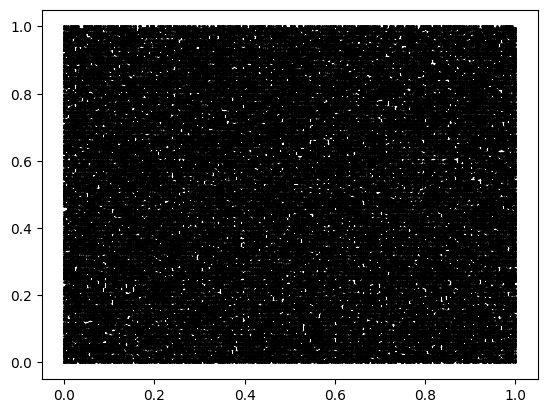

In [4]:
from BNumMet.Random import lehmers_rand, clear_lehmers_vars

clear_lehmers_vars()
fail2 = (
    lambda: float(
        (int(lehmers_rand(a=65539, c=0, m=2**31, x=123) * (2**31)) >> 23) & 0xFF
    )
    / 255
)
fail = [(fail2(), fail2()) for i in range(100000)]
plt.scatter(*zip(*fail), s=1, c="black")
plt.show()

## Marsaglia Generator

### Example 1

In [5]:
from BNumMet.Random import marsaglia_rand, clear_marsaglia_vars

clear_marsaglia_vars()
for i in range(10):
    print(marsaglia_rand(base=41, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)))

0.975609756097561
0.024390243902439025
0.926829268292683
0.0975609756097561
0.8048780487804879
0.2926829268292683
0.4878048780487805
0.8048780487804879
0.6585365853658537
0.12195121951219512


### Example 2

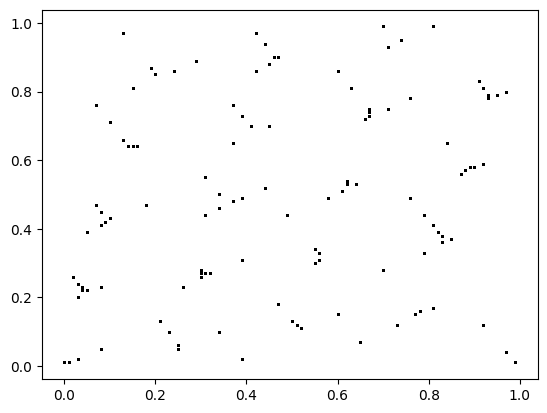

In [12]:
from BNumMet.Random import marsaglia_rand, clear_marsaglia_vars

clear_marsaglia_vars()
fail = [
    (
        marsaglia_rand(base=100, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
        marsaglia_rand(base=100, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
    )
    for i in range(100000)
]
plt.scatter(*zip(*fail), s=1, c="black")

### Example 3

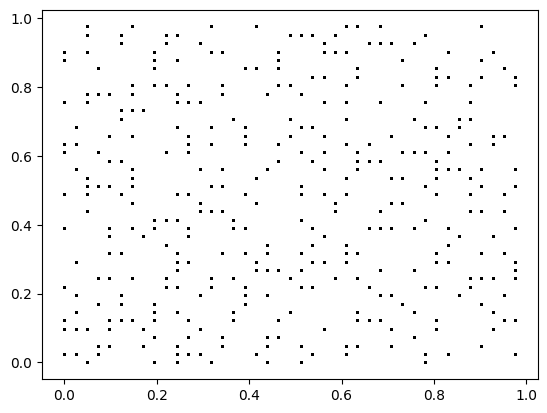

In [13]:
from BNumMet.Random import marsaglia_rand, clear_marsaglia_vars

clear_marsaglia_vars()
fail = [
    (
        marsaglia_rand(base=41, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
        marsaglia_rand(base=41, lag_r=2, lag_s=1, carry=0, seed_tuple=(0, 1)),
    )
    for i in range(100000)
]
plt.scatter(*zip(*fail), s=1, c="black")

## Mersenne Twister Generator

### Example 1

In [7]:
from BNumMet.Random import clear_mt_vars, genrand

clear_mt_vars()
for i in range(10):
    print(genrand())

Initialized the global dictionary mtVars with seed 4357
0.8173300600185361
0.9990608997175147
0.5103543725587322
0.13153290984489324
0.03541634837990076
0.9924695345089932
0.6257087035630151
0.06259194576707482
0.4107105111262553
0.13477367491805314


### Example 2

Initialized the global dictionary mtVars with seed 4357


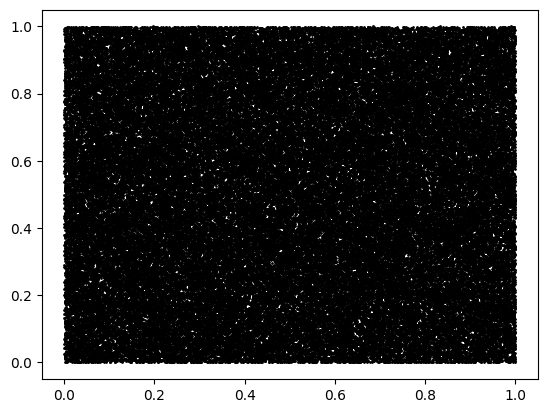

In [8]:
from BNumMet.Random import clear_mt_vars, genrand

clear_mt_vars()
toPlot = [(genrand(), genrand()) for i in range(100000)]
plt.scatter(*zip(*toPlot), s=1, c="black")

### Example 3: Tests

In [9]:
import numpy
from nistrng import *

clear_mt_vars()
# Test genrand from nistrng
sequence = numpy.array([genrand() * 0xFFFFFFFF for i in range(100)], dtype=numpy.uint64)


binary_sequence: numpy.ndarray = pack_sequence(sequence)

# Check the eligibility of the test and generate an eligible battery from the default NIST-sp800-22r1a battery
eligible_battery: dict = check_eligibility_all_battery(
    binary_sequence, SP800_22R1A_BATTERY
)
for i in eligible_battery:
    print(i)

# Test the sequence on the eligible tests
results = run_all_battery(binary_sequence, eligible_battery, False)
# Print results one by one
results = [result.passed for result, _ in results]
print(results)

Initialized the global dictionary mtVars with seed 4357
monobit
frequency_within_block
runs
longest_run_ones_in_a_block
dft
non_overlapping_template_matching
serial
approximate_entropy
cumulative sums
random_excursion
random_excursion_variant
[True, True, True, True, True, True, True, True, True, False, True]
